# Employment access

Estimate access to employment within a 30 min walking radious for the Mind-The-Gap Index.

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/.local/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/edgaregurrola/.local/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Download data

### Municipality boundaries

In [2]:
mun_schema = 'metropolis'
mun_folder = 'metro_list'

city = 'Guadalajara'

query = f"SELECT * FROM {mun_schema}.{mun_folder} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')

print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


### Nodes, edges and Graph

In [3]:
mun_gdf = mun_gdf.set_crs("EPSG:4326")

G,nodes,edges = aup.graph_from_hippo(mun_gdf, schema='osmnx', 
                    edges_folder='edges_speed', nodes_folder='nodes_elevation')

In [4]:
print(nodes.shape)
nodes.head(4)

(195754, 6)


,index,x,y,street_count,elevation,geometry
osmid,,,,,,
28751344,0,-103.306309,20.711533,3.0,1548.0,POINT (-103.30631 20.71153)
28753224,1,-103.316645,20.700650,3.0,1530.0,POINT (-103.31665 20.70065)
28757751,2,-103.307356,20.708526,3.0,1548.0,POINT (-103.30736 20.70853)
28757777,3,-103.306806,20.710093,4.0,1548.0,POINT (-103.30681 20.71009)


In [5]:
print(edges.shape)
edges.head(4)

(469334, 19)


osmid  oneway lanes              name  \
u          v          key                                              
1677125182 6828664581 0    481701777   False  None    Calle Iturbide   
           1785633323 0    155311958   False  None  Calle Cuauhtémoc   
           1677125262 0    481701777   False  None    Calle Iturbide   
6828664581 1677125182 0    481701777   False  None    Calle Iturbide   

                               highway  length  \
u          v          key                        
1677125182 6828664581 0    residential  34.569   
           1785633323 0    residential  70.094   
           1677125262 0    residential  49.880   
6828664581 1677125182 0    residential  34.569   

                                                                    geometry  \
u          v          key                                                      
1677125182 6828664581 0    LINESTRING (-103.26683 20.62524, -103.26691 20...   
           1785633323 0    LINESTRING (-103.26683 20.62524, -103.26617 20...   
           1677125262 0    LINESTRING (-103.26683 20.62524, -103.26674 20...   
6828664581 1677125182 0    LINESTRING (-103.26691 20.62494, -103.26683 20...   

                           grade  grade_abs access tunnel   ref maxspeed  \
u          v          key                                                  
1677125182 6828664581 0    0.000      0.000   None   None  None     None   
           1785633323 0    0.043      0.043   None   None  None     None   
           1677125262 0   -0.020      0.020   None   None  None     None   
6828664581 1677125182 0    0.000      0.000   None   None  None     None   

                          bridge junction service width  walkspeed  time_min  
u          v          key                                                     
1677125182 6828664581 0     None     None    None  None   4.000000  0.518535  
           1785633323 0     None     None    None  None   3.441111  1.222175  
           1677125262 0     None     None    None  None   3.729575  0.802451  
6828664581 1677125182 0     None     None    None  None   4.000000  0.518535

## Calculate isochrone

In [36]:
osmid = 28751344
iso_geom = aup.calculate_isochrone(G, osmid, 30, dist_column='time_min')

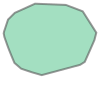

In [18]:
iso_geom

## Download DENUE

In [20]:
folder_denue = 'denue'
table_denue = 'denue_2020'

query = f"SELECT * FROM {folder_denue}.{table_denue} WHERE ST_Intersects(geometry, \'SRID=4326;{iso_geom}\')"

denue = aup.gdf_from_query(query, geometry_col='geometry')

In [23]:
print(denue.shape)
denue.head(4)

(3427, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,6146501.0,"CONSTRUCTORA 501, SA DE CV",CONSTRUCTORA 501 SA DE CV,236221.0,Edificación de inmuebles comerciales y de serv...,11 a 30 personas,CALLE,ANDRUS ARROYO DE ANDA,PRIVADA,NINGUNO,...,3020,3.0,nan,None,None,Fijo,20.716187,-103.30185,2010-07,POINT (-103.30185 20.71619)
1,1659342.0,BODEGA DE INSTALACION DE CERCA DE ALTO VOLTAJE...,None,238990.0,Otros trabajos especializados para la construc...,0 a 5 personas,CALLE,IGUALDAD,CALLE,MONTES URALES,...,0204,5.0,3315809891.0,None,None,Fijo,20.709557,-103.31857,2010-07,POINT (-103.31857 20.70956)
2,6146215.0,"CONSTRUCCIONES VTR3, SA DE CV",CONSTRUCCIONES VTR3 SA DE CV,237312.0,"Construcción de carreteras, puentes y similares",6 a 10 personas,CALLE,JUSTICIA,CALLE,MONTE EVEREST,...,0191,23.0,nan,CONSVTR3@PRODIGY.NET.MX,None,Fijo,20.712486,-103.31969,2010-07,POINT (-103.31969 20.71249)
3,1679326.0,EDUARDO MAGALLANES RUBIO,,238210.0,Instalaciones eléctricas en construcciones,11 a 30 personas,CALLE,SAN CLEMENTE,CALLE,BELISARIO DOMÍNGUEZ,...,0223,11.0,nan,None,None,Fijo,20.708360,-103.31250,2010-07,POINT (-103.31250 20.70836)


## Jobs from DENUE

In [6]:
def number_of_jobs(per_ocu):
    jobs_dict = {'0 a 5 personas':3,
                '6 a 10 personas':8,
                '11 a 30 personas':20,
                '31 a 50 personas':40,
                '51 a 100 personas':75,
                '101 a 250 personas':175,
                '251 y más personas':325}
    per_ocu_num = jobs_dict[per_ocu]
    return per_ocu_num

In [31]:
denue['per_ocu_num'] = denue.per_ocu.apply(lambda per_ocu: number_of_jobs(per_ocu))

## Data to nodes

In [35]:
nodes_job = nodes.reset_index()[['osmid','geometry']].copy()
nodes_job.head(2)

,osmid,geometry
0,28751344,POINT (-103.30631 20.71153)
1,28753224,POINT (-103.31665 20.70065)


In [38]:
nodes_job.loc[nodes_job.osmid==osmid, 'denue_count'] = denue.shape[0]
nodes_job.loc[nodes_job.osmid==osmid, 'denue_jobs'] = denue.per_ocu_num.sum()

In [7]:
denue_size_dict = jobs_dict = {'denue_0_5':'0 a 5 personas',
                'denue_6_10':'6 a 10 personas',
                'denue_11_30':'11 a 30 personas',
                'denue_31_50':'31 a 50 personas',
                'denue_51_100':'51 a 100 personas',
                'denue_101_250':'101 a 250 personas',
                'denue_250_mas':'251 y más personas'}

In [40]:
for denue_size in denue_size_dict.keys():
    nodes_job.loc[nodes_job.osmid==osmid, denue_size] = denue.loc[denue.per_ocu==denue_size_dict[denue_size]].shape[0]

In [41]:
nodes_job.loc[nodes_job.osmid==osmid]

,osmid,geometry,denue_count,denue_jobs,denue_0_5,denue_6_10,denue_11_30,denue_31_50,denue_51_100,denue_101_250,denue_250_mas
0,28751344,POINT (-103.30631 20.71153),3427.0,17953.0,3037.0,189.0,159.0,20.0,11.0,7.0,4.0


## Nodes analysis pipeline

In [8]:
from tqdm import tqdm

In [16]:
folder_denue = 'denue'
table_denue = 'denue_2020'

osmid_isochrone = {}

nodes_job = nodes.reset_index()[['osmid','geometry']].copy()

# idx = nodes_job.denue_count.isna()

# osmid_list = nodes_job.loc[idx].osmid.to_list()

for i in tqdm(range(len(nodes_job)), position=0, leave=True):
    osmid = nodes_job.iloc[i].osmid
    # create isochrone
    iso_geom = aup.calculate_isochrone(G, osmid, 30, dist_column='time_min')
    
    osmid_isochrone[osmid] = iso_geom

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195754/195754 [6:09:11<00:00,  8.84it/s]


In [21]:
iso_df = pd.DataFrame.from_dict(osmid_isochrone, orient='index').reset_index().rename(columns={'index':'osmid',0:'geometry'})
print(iso_df.shape)
iso_df.head(4)

(195754, 2)


,osmid,geometry
0,28751344,"POLYGON ((-103.3085567 20.6972379, -103.312141..."
1,28753224,"POLYGON ((-103.3151964 20.6864678, -103.325197..."
2,28757751,"POLYGON ((-103.3080782 20.6944792, -103.309356..."
3,28757777,"POLYGON ((-103.3090265 20.6956042, -103.313046..."


In [23]:
iso_gdf = gpd.GeoDataFrame(
    iso_df, geometry='geometry')
iso_gdf = iso_gdf.set_crs("EPSG:4326")

In [24]:
gdf_tmp = iso_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]

In [25]:
# download denue
query = f"SELECT * FROM {folder_denue}.{table_denue} WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"

denue = aup.gdf_from_query(query, geometry_col='geometry')

print(denue.shape)
denue.head(4)

(223492, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,9037647.0,ACUACTIVA,None,312112.0,Purificación y embotellado de agua,0 a 5 personas,CALLE,LOMA DE SAN BARTOLO,CALLE,LOMA DE SAN FERNANDO,...,2717,34.0,3311015515.0,None,None,Fijo,20.487580,-103.404526,2019-11,POINT (-103.40453 20.48758)
1,9037648.0,AGUA SANTA ANITA,None,312112.0,Purificación y embotellado de agua,0 a 5 personas,AVENIDA,LOMA DE VERONA PONIENTE,CALLE,LOMA DE FLORENCIA,...,2685,13.0,3312984699.0,None,None,Fijo,20.490816,-103.406380,2019-11,POINT (-103.40638 20.49082)
2,7862309.0,ELABORACIÓN DE CHOCOLATE Y PRODUCTOS DE CHOCOLATE,None,311350.0,Elaboración de chocolate y productos de chocolate,0 a 5 personas,BOULEVARD,LOMAS DEL SUR,CALLE,LOMA DE SAN LUIS,...,2651,33.0,3315372689.0,DUCMA57@HOTMAIL.COM,None,Fijo,20.492086,-103.400380,2019-11,POINT (-103.40038 20.49209)
3,7311417.0,LONCHERIA Y NEVERIA ALEX,None,311520.0,Elaboración de helados y paletas,0 a 5 personas,CALLE,LAZARO CARDENAS,PRIVADA,DE VELAZQUEZ,...,276A,1.0,nan,None,None,Fijo,20.464120,-103.402590,2019-11,POINT (-103.40259 20.46412)


In [26]:
# calculate jobs
denue['per_ocu_num'] = denue.per_ocu.apply(lambda per_ocu: number_of_jobs(per_ocu))

### Intersect isochrones and denue

In [ ]:
gpd.sjoin(iso_gdf, denue)

In [ ]:

# download denue
query = f"SELECT * FROM {folder_denue}.{table_denue} WHERE ST_Intersects(geometry, \'SRID=4326;{iso_geom}\')"

denue = aup.gdf_from_query(query, geometry_col='geometry')
# calculate jobs
denue['per_ocu_num'] = denue.per_ocu.apply(lambda per_ocu: number_of_jobs(per_ocu))
# jobs data to nodes
nodes_job.loc[nodes_job.osmid==osmid, 'denue_count'] = denue.shape[0]
nodes_job.loc[nodes_job.osmid==osmid, 'denue_jobs'] = denue.per_ocu_num.sum()

for denue_size in denue_size_dict.keys():
    nodes_job.loc[nodes_job.osmid==osmid, denue_size] = denue.loc[denue.per_ocu==denue_size_dict[denue_size]].shape[0]